<a href="https://colab.research.google.com/github/Anchita2004/Celebal-Technologies-Project/blob/main/Project_Celebal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Import all the essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
file_path = "german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount", "Savings",
    "EmploymentSince", "InstallmentRate", "PersonalStatusSex", "OtherDebtors",
    "ResidenceSince", "Property", "Age", "OtherInstallmentPlans", "Housing",
    "NumberExistingCredits", "Job", "NumberPeopleLiable", "Telephone",
    "ForeignWorker", "CreditRisk"
]

In [8]:
# Read data
df = pd.read_csv("/content/german.data", sep=' ', header=None, names=columns)

In [10]:
print(df)

     Status  Duration  CreditHistory  Purpose  CreditAmount  Savings  \
0         0         6              4        4          1169        4   
1         1        48              2        4          5951        0   
2         3        12              4        7          2096        0   
3         0        42              2        3          7882        0   
4         0        24              3        0          4870        0   
..      ...       ...            ...      ...           ...      ...   
995       3        12              2        3          1736        0   
996       0        30              2        1          3857        0   
997       3        12              2        4           804        0   
998       0        45              2        4          1845        0   
999       1        45              4        1          4576        1   

     EmploymentSince  InstallmentRate  PersonalStatusSex  OtherDebtors  ...  \
0                  4                4                  2

In [11]:
#To print the name of the columns present in the dataset
print(df.columns)

Index(['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
       'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
       'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
       'OtherInstallmentPlans', 'Housing', 'NumberExistingCredits', 'Job',
       'NumberPeopleLiable', 'Telephone', 'ForeignWorker', 'CreditRisk'],
      dtype='object')


In [12]:
print(df.isnull().sum())

Status                   0
Duration                 0
CreditHistory            0
Purpose                  0
CreditAmount             0
Savings                  0
EmploymentSince          0
InstallmentRate          0
PersonalStatusSex        0
OtherDebtors             0
ResidenceSince           0
Property                 0
Age                      0
OtherInstallmentPlans    0
Housing                  0
NumberExistingCredits    0
Job                      0
NumberPeopleLiable       0
Telephone                0
ForeignWorker            0
CreditRisk               0
dtype: int64


In [13]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop("CreditRisk", axis=1)
y = df["CreditRisk"]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.805

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.93      0.87       141
           2       0.75      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200



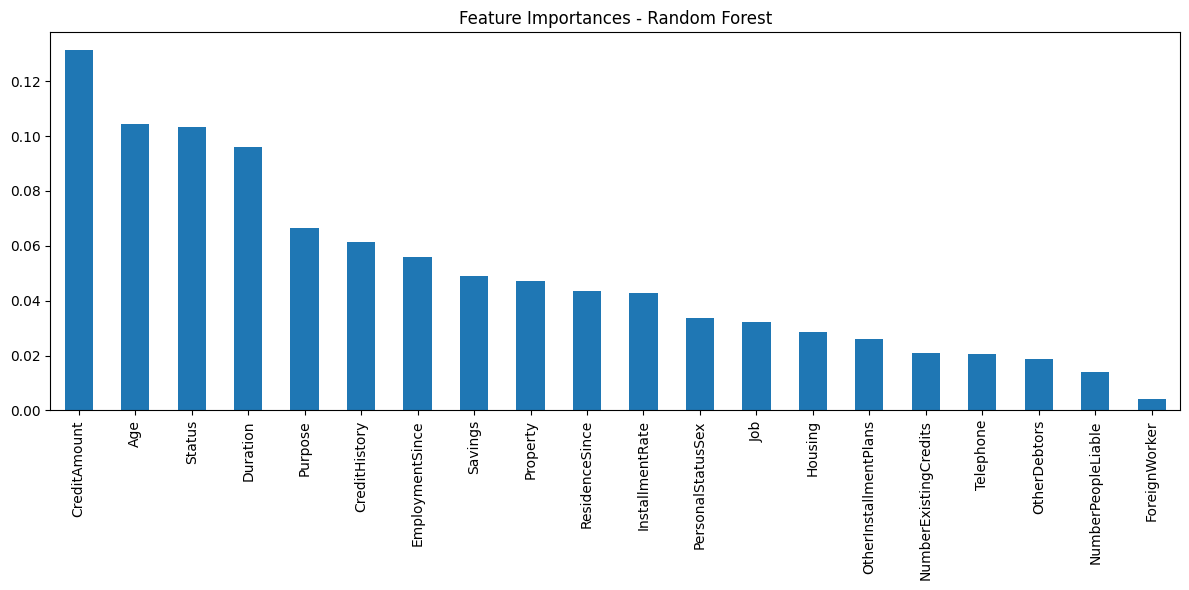

In [16]:
# Plot feature importances
plt.figure(figsize=(12, 6))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

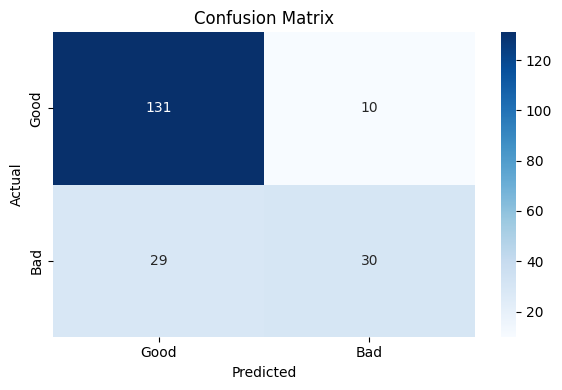

In [17]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Bad"], yticklabels=["Good", "Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


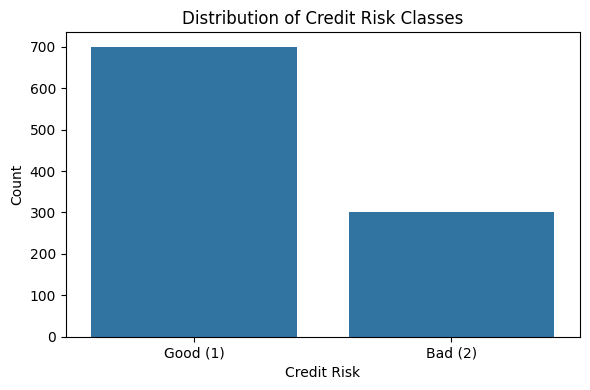

In [18]:
#Target distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="CreditRisk")
plt.title("Distribution of Credit Risk Classes")
plt.xticks([0, 1], ["Good (1)", "Bad (2)"])
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


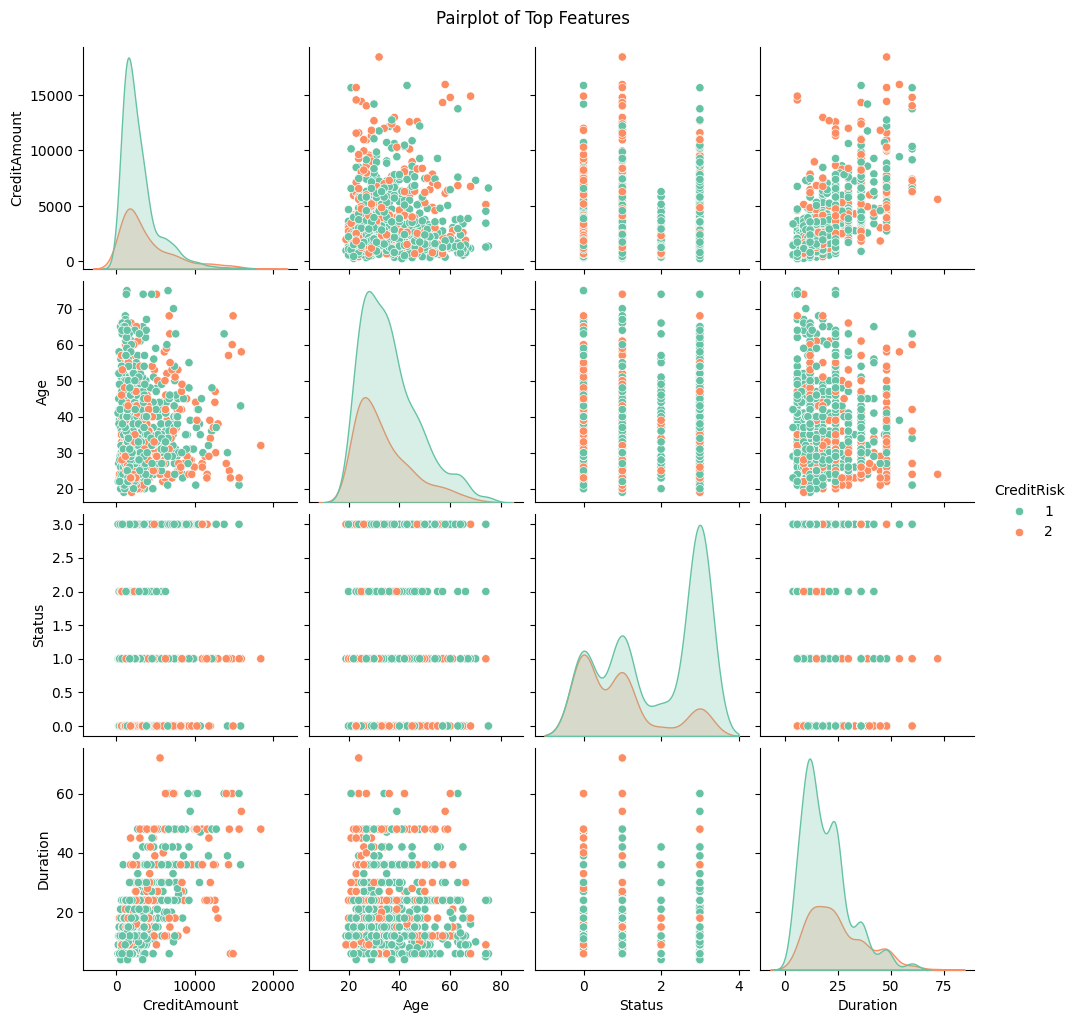

In [19]:
#Pair-plot of selected features
# Select top features by importance
top_features = importances.sort_values(ascending=False).head(4).index.tolist()

sns.pairplot(df[top_features + ['CreditRisk']], hue='CreditRisk', palette='Set2')
plt.suptitle("Pairplot of Top Features", y=1.02)
plt.show()


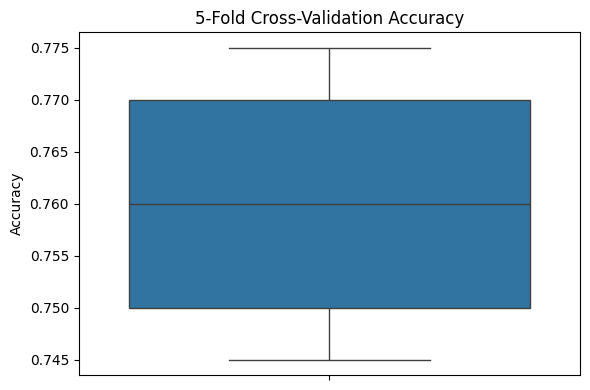

Cross-validation mean accuracy: 0.76


In [20]:
#Cross-Validation performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
plt.figure(figsize=(6, 4))
sns.boxplot(scores)
plt.title("5-Fold Cross-Validation Accuracy")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

print("Cross-validation mean accuracy:", scores.mean())
